## Bitcoin Data Preparation


In [1]:
import numpy as np
import pandas as pd
import hvplot.pandas
from datetime import datetime, date
from functools import reduce

In [2]:
# Load the fear and greed sentiment data for Bitcoin (only fear and greed index)
fng_df = pd.read_csv('fng.csv')
fng_df = fng_df.rename(columns={'date':'Date', 'value_classification':'fng_class'})
fng_df = fng_df.drop(columns=['value'])
mapping = {'Extreme Fear':'-1.0', 'Fear':'-0.5', 'Neutral':'0.0', 
        'Greed':'0.5', 'Extreme Greed':'1.0'}
fng_df['fng_class'] = fng_df['fng_class'].map(mapping)
fng_df['fng_class'] = pd.to_numeric(fng_df['fng_class'])
fng_df['fng_class'] = fng_df['fng_class'].astype(float)
fng_df.set_index(['Date'], inplace=True)
fng_df.head()

,fng_class
Date,
2021-01-16,1.0
2021-01-15,1.0
2021-01-14,1.0
2021-01-13,1.0
2021-01-12,1.0


In [3]:
# Load the vader sentiment data for Bitcoin
btc_vader_df = pd.read_csv('btc_vader.csv', infer_datetime_format=True, parse_dates=True)
btc_vader_df["Publish Date"] = [date[0:10] for date in btc_vader_df["Publish Date"]]
btc_vader_df = btc_vader_df.drop(columns=["Post ID", "Title", "Url", "Author", "Score", "Total No. of Comments", "Permalink",
        "title_pos", "title_neu", "title_neg", "title_sent"], axis=1)
btc_vader_df.rename(columns = {'Publish Date':'Date', 'title_compound': 'vader_compound'}, inplace = True)
btc_vader_df['vader_compound'] = btc_vader_df['vader_compound'].astype(float).round(decimals=2)
btc_vader_df.set_index(['Date'], inplace=True)
btc_vader_df.head()

,vader_compound
Date,
2019-01-16,0.00
2019-01-17,0.51
2019-01-17,0.00
2019-01-18,-0.78
2019-01-21,0.28


In [4]:
# Load the historical closing prices for Bitcoin
btc_close_df = pd.read_csv('btcprices.csv')
btc_close_df = btc_close_df.sort_index()
btc_close_df = btc_close_df.rename(columns={'date':'Date', 'close':'close_price'})
btc_close_df = btc_close_df.drop(["symbol", "volume"], axis=1)
btc_close_df.set_index(['Date'], inplace=True)
btc_close_df.head()

,close_price
Date,
2019-01-28,3431.0
2019-01-29,3395.0
2019-01-30,3436.9
2019-01-31,3409.6
2019-02-01,3437.2


In [5]:
# Load the exponential weighted moving average data for Bitcoin
btc_ewm_df = pd.read_csv('btc_ema.csv')
btc_ewm_df = btc_ewm_df.sort_index()
btc_ewm_df = btc_ewm_df.rename(columns={'date':'Date', 'crossover_signal':'ewm_cross_signal'})
btc_ewm_df = btc_ewm_df.drop(["symbol", "close", "volume", "daily_return", "fast_close", "slow_close", "crossover_long", "crossover_short"], axis=1)
btc_ewm_df['ewm_cross_signal'] = btc_ewm_df['ewm_cross_signal'].astype(float)
btc_ewm_df.set_index(['Date'], inplace=True)
btc_ewm_df.head()

,ewm_cross_signal
Date,
2019-01-28,0.0
2019-01-29,-1.0
2019-01-30,1.0
2019-01-31,-1.0
2019-02-01,1.0


In [6]:
# Load the money flow index for Bitcoin
btc_mfi_df = pd.read_csv('mfi_btc.csv')
btc_mfi_df = btc_mfi_df.sort_index()
btc_mfi_df = btc_mfi_df.rename(columns={'date':'Date'})
btc_mfi_df = btc_mfi_df.drop(["symbol", "close", "volume", "Buy", "Sell"], axis=1)
btc_mfi_df['MFI'] = btc_mfi_df['MFI'].round(decimals=2)
btc_mfi_df.set_index(['Date'], inplace=True)
btc_mfi_df.head()

,MFI
Date,
2019-02-11,55.39
2019-02-12,60.80
2019-02-13,53.08
2019-02-14,55.36
2019-02-15,52.94


In [7]:
# Load the money flow index for Bitcoin
btc_google_df = pd.read_csv('btc_google.csv')
btc_google_df = btc_google_df.sort_index()
btc_google_df = btc_google_df.rename(columns={'Google Search Count':'google_search'})
btc_google_df['google_search'] = btc_google_df['google_search'].astype(float)
btc_google_df.set_index(['Date'], inplace=True)
btc_google_df.head()

,google_search
Date,
2019-01-28,11.0
2019-01-29,11.0
2019-01-30,11.0
2019-01-31,11.0
2019-02-01,11.0


In [8]:
# MERGE the closing price, ewm, fng, mfi, and Google DataFrames into a single DataFrame
btc_dfs = [btc_close_df, btc_ewm_df, fng_df, btc_mfi_df, btc_google_df]
btc_data_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), btc_dfs)
btc_df = btc_data_df.merge(btc_vader_df, on = 'Date', how = 'left')
#btc_df.replace(np.nan, 0)
btc_df['vader_compound'] = btc_df['vader_compound'].fillna(0)
btc_df.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search,vader_compound
Date,,,,,,
2019-02-11,3591.7,1.0,-0.5,55.39,11.0,0.30
2019-02-11,3591.7,1.0,-0.5,55.39,11.0,0.00
2019-02-12,3588.9,1.0,-0.5,60.80,11.0,0.00
2019-02-12,3588.9,1.0,-0.5,60.80,11.0,0.45
2019-02-13,3579.8,1.0,0.0,53.08,11.0,0.00


In [10]:
# Load the gas price data for Bitcoin
btc_gas_df = pd.read_csv('bitcoin_fees.csv')
btc_gas_df = btc_gas_df.sort_index()
btc_gas_df["bitcoin_Date"] = [date[0:10] for date in btc_gas_df["bitcoin_Date"]]
btc_gas_df = btc_gas_df.rename(columns={'bitcoin_Date':'Date'})
btc_gas_df["std_gas"] = (btc_gas_df['bitcoin_Fee'] - btc_gas_df['bitcoin_Fee'].min())/(btc_gas_df['bitcoin_Fee'].max() - btc_gas_df['bitcoin_Fee'].min())
btc_gas_df.set_index(['Date'], inplace=True)
btc_gas_df = btc_gas_df.drop(columns=['bitcoin_Fee'], axis=1)
btc_gas_df.head()

,std_gas
Date,
2019-01-27,0.046078
2019-11-23,0.065758
2019-12-22,0.035249
2019-02-28,0.096280
2019-10-21,0.062563


In [11]:
# Load the mining difficulty data for Bitcoin
btc_diff_df = pd.read_csv('bitcoin_difficulty.csv')
btc_diff_df = btc_diff_df.sort_index()
btc_diff_df["Date"] = [date[0:10] for date in btc_diff_df["Date"]]
btc_diff_df = btc_diff_df.rename(columns={'Date':'Date'})
btc_diff_df = btc_diff_df.sort_index()
btc_diff_df['Difficulty'] = btc_diff_df['Difficulty'].astype(float)
btc_diff_df["std_diff"] = (btc_diff_df['Difficulty'] - btc_diff_df['Difficulty'].min())/(btc_diff_df['Difficulty'].max() - btc_diff_df['Difficulty'].min())
btc_diff_df.set_index(['Date'], inplace=True)
btc_diff_df = btc_diff_df.drop(columns=['Difficulty'], axis=1)
btc_diff_df.head()

,std_diff
Date,
2020-05-08,0.104802
2020-05-08,0.104802
2020-05-08,0.104802
2020-05-08,0.104802
2020-05-08,0.104802


In [12]:
# Load the actual Bitcoin value (transfers) data for Bitcoin (volume of transactions by day)
btc_value_df = pd.read_csv('bitcoin_size.csv') #, index_col="date", infer_datetime_format=True, parse_dates=True)
btc_value_df = btc_value_df.sort_index()
btc_value_df["bitcoin_Date"] = [date[0:10] for date in btc_value_df["bitcoin_Date"]]
btc_value_df = btc_value_df.rename(columns={'bitcoin_Date':'Date'})
btc_value_df['bitcoin_Size'] = btc_value_df['bitcoin_Size'].astype(float)
btc_value_df["std_value"] = (btc_value_df['bitcoin_Size'] - btc_value_df['bitcoin_Size'].min())/(btc_value_df['bitcoin_Size'].max() - btc_value_df['bitcoin_Size'].min())
btc_value_df.set_index(['Date'], inplace=True)
btc_value_df = btc_value_df.drop(columns=['bitcoin_Size'], axis=1)
btc_value_df.head()

,std_value
Date,
2019-01-27,0.461083
2021-01-19,0.739391
2020-03-16,0.546066
2019-06-19,0.798380
2020-09-02,0.722656


In [13]:
# MERGE the mining data into a single DataFrame
dfs = [btc_diff_df, btc_gas_df, btc_value_df]
btc_mining_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
btc_string_time = "2019-02-08"
btc_datetime = datetime.strptime(btc_string_time, "%Y-%m-%d")
btc_mining_df.rename(columns = {'f0_':'Date', 'std_diff':'mining_difficulty', 'std_gas': 'gas_price', 'std_value':'total_transfers' }, inplace = True)
btc_mining_df.head()

,mining_difficulty,gas_price,total_transfers
Date,,,
2020-05-08,0.104802,0.353794,0.676025
2020-05-08,0.104802,0.353794,0.676025
2020-05-08,0.104802,0.353794,0.676025
2020-05-08,0.104802,0.353794,0.676025
2020-05-08,0.104802,0.353794,0.676025


In [14]:
# MERGE btc_mining_df with btc_df
btc_master_df = btc_df.merge(btc_mining_df, on = 'Date', how = 'left')
btc_master_df = btc_master_df.drop_duplicates()
btc_master_df.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search,vader_compound,mining_difficulty,gas_price,total_transfers
Date,,,,,,,,,
2019-02-11,3591.7,1.0,-0.5,55.39,11.0,0.30,0.899538,0.071305,0.610672
2019-02-11,3591.7,1.0,-0.5,55.39,11.0,0.00,0.899538,0.071305,0.610672
2019-02-12,3588.9,1.0,-0.5,60.80,11.0,0.00,0.899538,0.110306,0.645904
2019-02-12,3588.9,1.0,-0.5,60.80,11.0,0.45,0.899538,0.110306,0.645904
2019-02-13,3579.8,1.0,0.0,53.08,11.0,0.00,0.899538,0.114917,0.683483


---

## Random Forest Regressor for Multiple Features

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import load_boston
import shap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Fitting and Predicting

In [16]:
# Define features set and target vector
dataset = btc_master_df
X = btc_master_df[['mining_difficulty', 'ewm_cross_signal','fng_class','MFI','google_search', 'vader_compound', 'gas_price', 'total_transfers']]
y = btc_master_df['close_price'].ravel()

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_test= np.split(X, [int(.8 *len(X))])
y_train, y_test= np.split(y, [int(.8 *len(y))])

In [18]:
# Create Random Forest Regressor and fit the model
rf_model = RandomForestRegressor(n_estimators=10, random_state=78)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=78)

In [19]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)

### Feature Importance

In [20]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.6676547602956587, 'mining_difficulty'),
 (0.24545374791931002, 'fng_class'),
 (0.02793060798809389, 'google_search'),
 (0.027602821409377577, 'gas_price'),
 (0.021660953704122875, 'MFI'),
 (0.007278092752924311, 'total_transfers'),
 (0.002037409844846503, 'ewm_cross_signal'),
 (0.000381606085666117, 'vader_compound')]

Text(0.5, 1.0, 'Features Importances')

<Figure size 432x288 with 0 Axes>

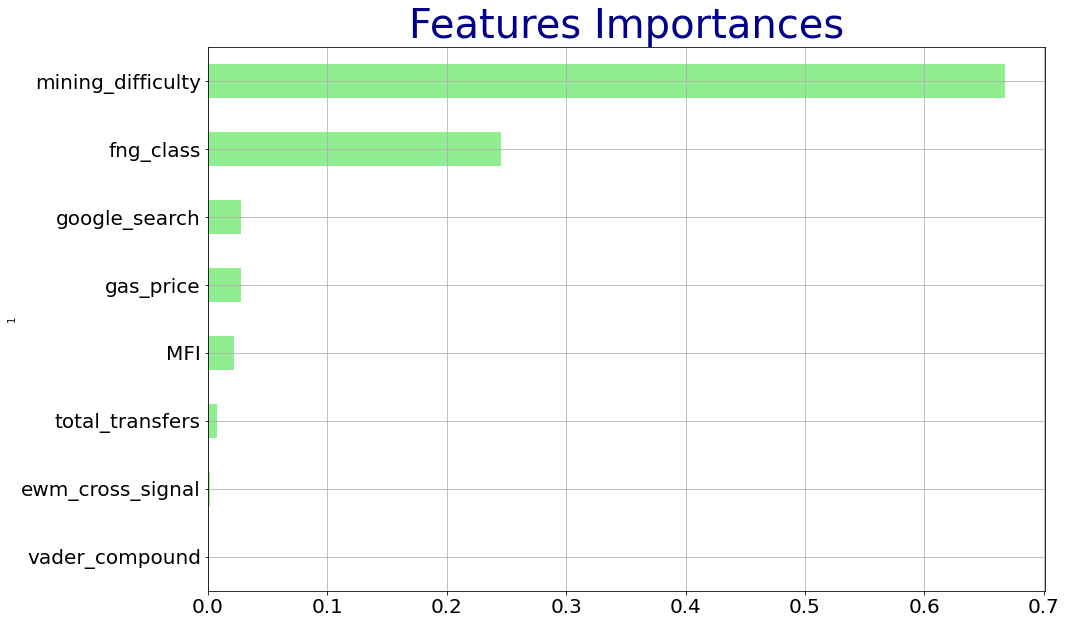

In [21]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
plt.savefig('features-importance.jpg')
importances_sorted.plot(kind='barh', color='lightgreen', figsize=(15,10), grid=True, 
                        fontsize=20, legend=False)
plt.title('Features Importances', fontsize=40, color='darkBlue')

In [22]:
# Plot SHAP Values
#explainer = shap.TreeExplainer(rf_model)
#shap_values = explainer.shap_values(X_test)
#plt.savefig('features-importance-shap.jpg')
#plt.title('Features Importance SHAP Values', fontsize=25, color='blue', pad=(5.0))
#shap.summary_plot(shap_values, X_test)

### Model Evaluation

In [23]:
# r2_score (fit score) test
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, rf_model.predict(X_test))

-0.4862156330337932

In [24]:
# r2_score train
r2_score(y_train, rf_model.predict(X_train))

0.9979702385797609

In [25]:
mean_squared_error(y_test, rf_model.predict(X_test))

104847461.85792889

In [26]:
# FIX PERCENTAGE mean squared error
mean_squared_error(y_test, rf_model.predict(X_test), squared=False)

10239.504961565715

In [27]:
mse = mean_squared_error(y_test, rf_model.predict(X_test))

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rolling_mse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"Rolling MSE: {rolling_mse}")

MSE: 104847461.85792889
Rolling MSE: 10239.504961565715


In [28]:
btc_master_train_df, btc_master_test_df= np.split(btc_master_df, [int(.8 *len(btc_master_df))])
pred_df = pd.DataFrame(predictions, columns=['prediction_price'])
pred_df.index = btc_master_test_df.index
pred_df.head()

,prediction_price
Date,
2020-09-18,10934.7
2020-09-19,10785.2
2020-09-19,10785.2
2020-09-19,10785.2
2020-09-19,10785.2


In [29]:
#JOIN/MERGE/APPEND dataframes
btc_combined = btc_master_df.join(pred_df)
btc_combined.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price
Date,,,,,,,,,,
2019-02-11,3591.7,1.0,-0.5,55.39,11.0,0.30,0.899538,0.071305,0.610672,NaN
2019-02-11,3591.7,1.0,-0.5,55.39,11.0,0.00,0.899538,0.071305,0.610672,NaN
2019-02-12,3588.9,1.0,-0.5,60.80,11.0,0.00,0.899538,0.110306,0.645904,NaN
2019-02-12,3588.9,1.0,-0.5,60.80,11.0,0.45,0.899538,0.110306,0.645904,NaN
2019-02-13,3579.8,1.0,0.0,53.08,11.0,0.00,0.899538,0.114917,0.683483,NaN


In [30]:
btc_master_pct_change = btc_combined.pct_change()
btc_master_pct_change_corr = btc_master_pct_change.corr()
btc_master_pct_change_corr

,close_price,ewm_cross_signal,fng_class,MFI,google_search,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price
close_price,1.000000,0.009863,-0.061362,0.401640,-0.011440,0.000420,-0.006728,0.116059,0.018746,-0.000909
ewm_cross_signal,0.009863,1.000000,0.017187,0.002166,-0.017238,0.021861,0.031123,-0.112801,-0.055664,0.051626
fng_class,-0.061362,0.017187,1.000000,-0.079768,-0.030170,0.026777,0.001002,-0.067595,-0.082752,0.402632
MFI,0.401640,0.002166,-0.079768,1.000000,-0.002199,0.014506,-0.004702,0.025914,-0.021689,0.076410
google_search,-0.011440,-0.017238,-0.030170,-0.002199,1.000000,-0.021971,0.003516,0.133140,0.119220,-0.230816
vader_compound,0.000420,0.021861,0.026777,0.014506,-0.021971,1.000000,0.030340,-0.030282,0.013635,-0.023902
mining_difficulty,-0.006728,0.031123,0.001002,-0.004702,0.003516,0.030340,1.000000,-0.022539,0.019498,-0.012319
gas_price,0.116059,-0.112801,-0.067595,0.025914,0.133140,-0.030282,-0.022539,1.000000,0.469961,-0.232161
total_transfers,0.018746,-0.055664,-0.082752,-0.021689,0.119220,0.013635,0.019498,0.469961,1.000000,-0.082089
prediction_price,-0.000909,0.051626,0.402632,0.076410,-0.230816,-0.023902,-0.012319,-0.232161,-0.082089,1.000000


Text(0.5, 1.0, 'Heatmap of LSTM Model Features (btc)')

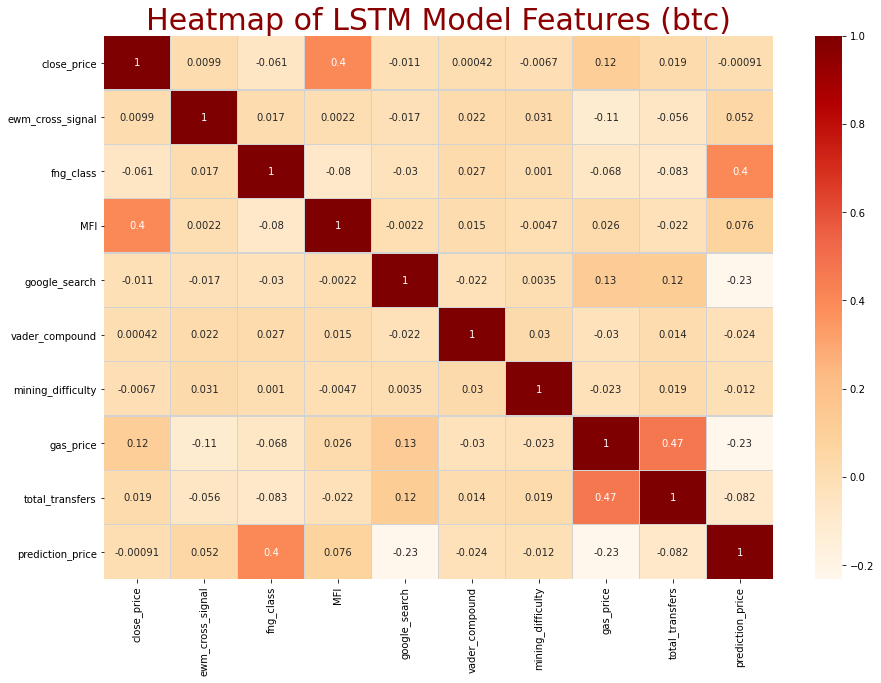

In [31]:
# Plot features importances heatmap
plt.figure(figsize = (15,10))
sns.heatmap(btc_master_pct_change_corr,cmap='OrRd', annot=True, linecolor='lightgray', linewidths=.3)
plt.savefig("rf_heatmap.jpg")
plt.title('Heatmap of LSTM Model Features (btc)', color='darkred', pad=3.0, fontsize = 30)

---

### RF Analysis for Win/Lose Call Accuracy

In [32]:
#Add column for "actual_day_positive_move" positive move = true & negative move = false
btc_combined["actual_day_positive_move"] = btc_combined["close_price"]-btc_combined["close_price"].shift(1)>0
btc_combined.tail()

,close_price,ewm_cross_signal,fng_class,MFI,google_search,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move
Date,,,,,,,,,,,
2021-01-15,36739.8,1.0,1.0,54.41,100.0,-0.65,0.0,0.504073,0.792897,9782.32,False
2021-01-15,36739.8,1.0,1.0,54.41,100.0,-0.65,0.0,0.504073,0.792897,9782.32,False
2021-01-15,36739.8,1.0,1.0,54.41,100.0,-0.65,0.0,0.504073,0.792897,9782.32,False
2021-01-15,36739.8,1.0,1.0,54.41,100.0,-0.65,0.0,0.504073,0.792897,9782.32,False
2021-01-16,37064.9,1.0,1.0,56.45,100.0,0.00,0.0,0.299330,0.753545,9710.20,True


In [33]:
#Add column for "predicted day positive move" positive move = true & negative move = false
btc_combined["predicted_day_positive_move"] = btc_combined["prediction_price"]-btc_combined["prediction_price"].shift(1)>0
btc_combined.tail()

,close_price,ewm_cross_signal,fng_class,MFI,google_search,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move,predicted_day_positive_move
Date,,,,,,,,,,,,
2021-01-15,36739.8,1.0,1.0,54.41,100.0,-0.65,0.0,0.504073,0.792897,9782.32,False,False
2021-01-15,36739.8,1.0,1.0,54.41,100.0,-0.65,0.0,0.504073,0.792897,9782.32,False,False
2021-01-15,36739.8,1.0,1.0,54.41,100.0,-0.65,0.0,0.504073,0.792897,9782.32,False,False
2021-01-15,36739.8,1.0,1.0,54.41,100.0,-0.65,0.0,0.504073,0.792897,9782.32,False,False
2021-01-16,37064.9,1.0,1.0,56.45,100.0,0.00,0.0,0.299330,0.753545,9710.20,True,False


In [34]:
# Add "correct call" column if both had true or both had false we have a true 
btc_combined["Correct Call Count"] = np.where(btc_combined["actual_day_positive_move"]==btc_combined["predicted_day_positive_move"], True, False)
btc_combined.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move,predicted_day_positive_move,Correct Call Count
Date,,,,,,,,,,,,,
2019-02-11,3591.7,1.0,-0.5,55.39,11.0,0.30,0.899538,0.071305,0.610672,NaN,False,False,True
2019-02-11,3591.7,1.0,-0.5,55.39,11.0,0.00,0.899538,0.071305,0.610672,NaN,False,False,True
2019-02-12,3588.9,1.0,-0.5,60.80,11.0,0.00,0.899538,0.110306,0.645904,NaN,False,False,True
2019-02-12,3588.9,1.0,-0.5,60.80,11.0,0.45,0.899538,0.110306,0.645904,NaN,False,False,True
2019-02-13,3579.8,1.0,0.0,53.08,11.0,0.00,0.899538,0.114917,0.683483,NaN,False,False,True


In [35]:
#Remove rows w/o predicted prices
rf_btc_calls = btc_combined.iloc[872:]
rf_btc_calls.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move,predicted_day_positive_move,Correct Call Count
Date,,,,,,,,,,,,,
2020-05-23,9178.6,1.0,-0.5,58.25,15.0,-0.13,0.135434,0.36751,0.586627,NaN,False,False,True
2020-05-23,9178.6,1.0,-0.5,58.25,15.0,-0.36,0.135434,0.36751,0.586627,NaN,False,False,True
2020-05-23,9178.6,1.0,-0.5,58.25,15.0,-0.42,0.135434,0.36751,0.586627,NaN,False,False,True
2020-05-24,8715.1,1.0,-0.5,60.37,15.0,0.00,0.135434,0.24680,0.633320,NaN,False,False,True
2020-05-24,8715.1,1.0,-0.5,60.37,15.0,-0.23,0.135434,0.24680,0.633320,NaN,False,False,True


In [36]:
# convert to pivot table
rf_btc_calls = rf_btc_calls.pivot_table(index=['Correct Call Count'], aggfunc='size')
rf_btc_calls

Correct Call Count
False     582
True     4747
dtype: int64

In [37]:
# calculate lose rate
rf_btc_calls['lose_rate'] = (rf_btc_calls.iloc[0] / (163))*100
rf_btc_calls

Correct Call Count
False         582.000000
True         4747.000000
lose_rate     357.055215
dtype: float64

In [38]:
# calculate win rate
rf_btc_calls['win_rate'] = (rf_btc_calls.iloc[1] / (163))*100
rf_btc_calls

Correct Call Count
False         582.000000
True         4747.000000
lose_rate     357.055215
win_rate     2912.269939
dtype: float64

---

## Features Decision Tree

In [39]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn import tree
import pydotplus
from IPython.display import Image

In [40]:
# Prepare the data
dataset = btc_combined
X = btc_combined[['close_price','ewm_cross_signal','fng_class','MFI','google_search', 'vader_compound', 'mining_difficulty', 'gas_price', 'total_transfers']]
y = btc_combined["close_price"].ravel()

In [41]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, min_samples_leaf=25, random_state=78)
model = regr.fit(X, y)

Text(0.5, 1.0, 'Features Decision Tree')

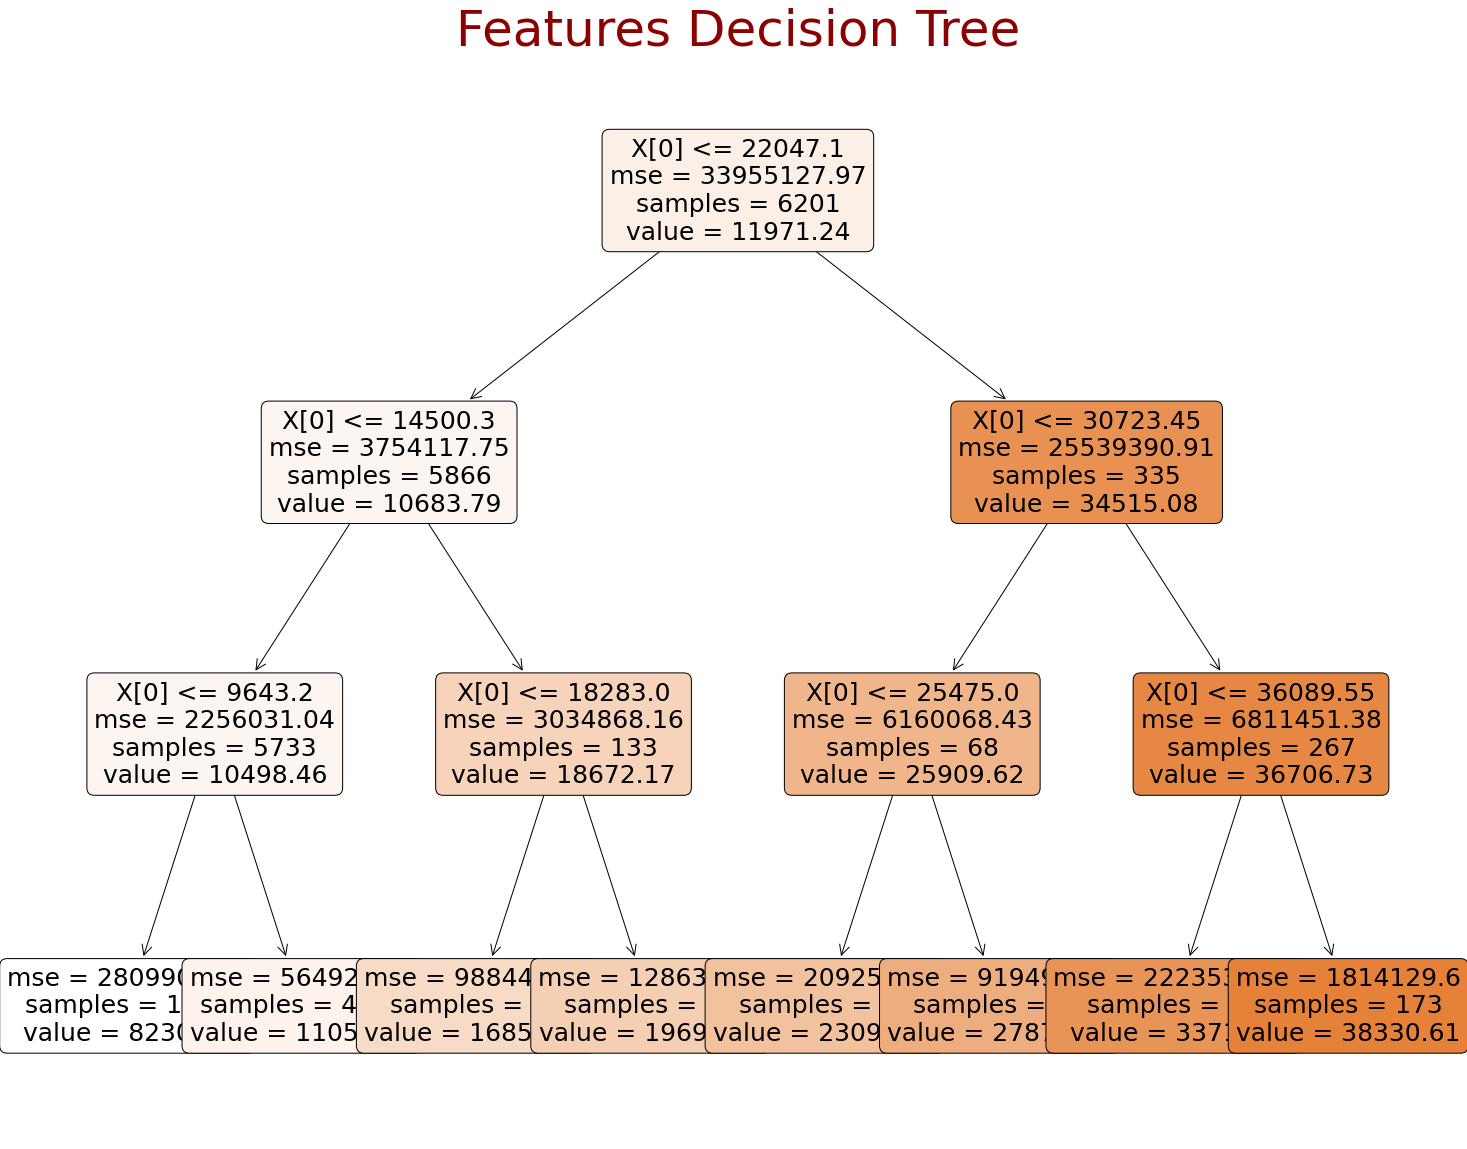

In [42]:
fig = plt.figure(figsize=(25,20))
plt.savefig('decision-tree.jpg')
fig = tree.plot_tree(regr, filled=True, rounded=True, precision=2, fontsize=25)
plt.title('Features Decision Tree', fontsize=50, color='darkred')

In [43]:
btc_combined = btc_master_df.join(pred_df)
btc_combined.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price
Date,,,,,,,,,,
2019-02-11,3591.7,1.0,-0.5,55.39,11.0,0.30,0.899538,0.071305,0.610672,NaN
2019-02-11,3591.7,1.0,-0.5,55.39,11.0,0.00,0.899538,0.071305,0.610672,NaN
2019-02-12,3588.9,1.0,-0.5,60.80,11.0,0.00,0.899538,0.110306,0.645904,NaN
2019-02-12,3588.9,1.0,-0.5,60.80,11.0,0.45,0.899538,0.110306,0.645904,NaN
2019-02-13,3579.8,1.0,0.0,53.08,11.0,0.00,0.899538,0.114917,0.683483,NaN


----

## LSTM Recurrent Neural Network for Historical and Predicted Closing Prices

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from numpy.random import seed
from tensorflow import random
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Set the random seed for reproducibility
seed(1)
random.set_seed(2)

In [46]:
# Create function for features (X) and targeet(y)
def window_data(btc_combined, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(btc_combined) - window - 1):
        features = btc_combined.iloc[i:(i + window), feature_col_number]
        target = btc_combined.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [47]:
# Predict Closing Prices 
window_size = 10

# Column 0 is `Close Price`
feature_column = 0
target_column = 0
X, y = window_data(btc_combined, window_size, feature_column, target_column)

In [48]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test_scaler = y[split:]

In [49]:
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test_scaler = scaler.transform(y_test_scaler)


In [50]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

---

### Build and Train the Model

In [51]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,             #carries the values forward
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [52]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [53]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 10, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [54]:
# Train the model
model.fit(X_train, y_train, epochs=50, shuffle=False, batch_size=100, verbose=0)

---

### Model Performance

In [55]:
# Evaluate the model
model.evaluate(X_test, y_test_scaler)

59/59 [==============================] - 1s 3ms/step - loss: 0.0345


0.034542012959718704

In [56]:
# Make some predictions
predicted = model.predict(X_test)

In [57]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_scaler.reshape(-1, 1))

In [58]:
# Create a DataFrame of Real and Predicted values
lstm_df = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = btc_combined.index[-len(real_prices): ]) 
lstm_df.head()

,Real,Predicted
Date,,
2020-10-07,10669.9,10717.103516
2020-10-07,10669.9,10717.103516
2020-10-07,10669.9,10717.103516
2020-10-07,10669.9,10717.103516
2020-10-07,10669.9,10717.103516


Text(0.5, 1.0, 'Bitcoin Historical Real Price vs. Predicted Price')

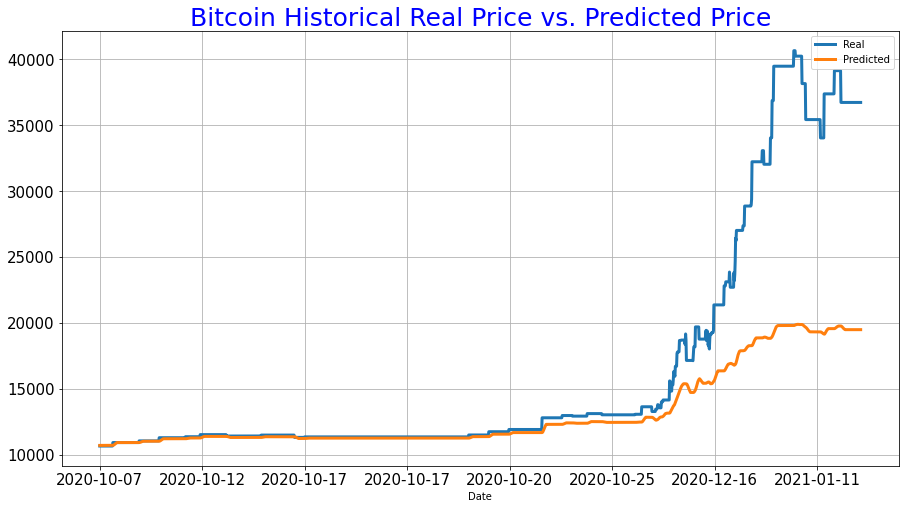

In [59]:
# Plot price comparison
lstm_df.plot(figsize=(15,8), fontsize=15, grid=True, linewidth=3)
plt.savefig('lstm.jpg')
plt.title('Bitcoin Historical Real Price vs. Predicted Price', fontsize=25, 
          fontweight=15, color='blue', pad=1.0)

In [60]:
lstm_df["actual_day_positive_move"] = lstm_df["Real"]-lstm_df["Real"].shift(1)>0
lstm_df.tail()

,Real,Predicted,actual_day_positive_move
Date,,,
2021-01-15,36739.8,19500.291016,False
2021-01-15,36739.8,19500.291016,False
2021-01-15,36739.8,19500.291016,False
2021-01-15,36739.8,19500.291016,False
2021-01-16,36739.8,19500.291016,False


In [61]:
lstm_df["predicted_day_positive_move"] = lstm_df["Predicted"]-lstm_df["Predicted"].shift(1)>0
lstm_df.tail()

,Real,Predicted,actual_day_positive_move,predicted_day_positive_move
Date,,,,
2021-01-15,36739.8,19500.291016,False,False
2021-01-15,36739.8,19500.291016,False,False
2021-01-15,36739.8,19500.291016,False,False
2021-01-15,36739.8,19500.291016,False,False
2021-01-16,36739.8,19500.291016,False,False


In [62]:
lstm_df["Call Accuracy Count"] = np.where(lstm_df["actual_day_positive_move"]==lstm_df["predicted_day_positive_move"], True, False)
lstm_df.tail()

,Real,Predicted,actual_day_positive_move,predicted_day_positive_move,Call Accuracy Count
Date,,,,,
2021-01-15,36739.8,19500.291016,False,False,True
2021-01-15,36739.8,19500.291016,False,False,True
2021-01-15,36739.8,19500.291016,False,False,True
2021-01-15,36739.8,19500.291016,False,False,True
2021-01-16,36739.8,19500.291016,False,False,True


In [63]:
lstm_df = lstm_df.pivot_table(index=['Call Accuracy Count'], aggfunc='size')
lstm_df_pivot = lstm_df
lstm_df_pivot

Call Accuracy Count
False     377
True     1480
dtype: int64

In [64]:
# calculate lose rate
lstm_df_pivot['lose_rate'] = (lstm_df_pivot.iloc[0] / (308))*100
lstm_df_pivot
#stock_pivot['win_rate'] = (stock_pivot.iloc[1] / (308))*100
#print("f: The lstm_df win rate is "{stock_pivot}".")

Call Accuracy Count
False         377.000000
True         1480.000000
lose_rate     122.402597
dtype: float64

In [65]:
# calculate win rate
lstm_df_pivot['win_rate'] = (lstm_df_pivot.iloc[1] / (308))*100
lstm_df_pivot

Call Accuracy Count
False         377.000000
True         1480.000000
lose_rate     122.402597
win_rate      480.519481
dtype: float64

---

## Which Model Had the Best Call Accuracy Rate?

In [66]:
combined_pivot = pd.concat([rf_btc_calls, lstm_df_pivot], axis=1, keys=['Random Forest Calls', 'LSTM RNN Calls'], join='inner')
combined_pivot

,Random Forest Calls,LSTM RNN Calls
False,582.000000,377.000000
True,4747.000000,1480.000000
lose_rate,357.055215,122.402597
win_rate,2912.269939,480.519481


Text(0.5, 1.0, 'Win/Lose Call Accuracy by Model')

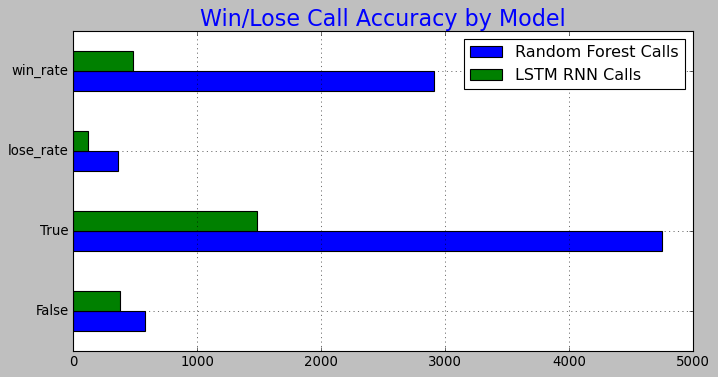

In [67]:
# Plot call accuracy by model
plt.style.use('classic')
combined_pivot = combined_pivot.plot(kind='barh', figsize=(10,5), fontsize=12, grid=True)
plt.savefig('win-lose-compare.jpg')
plt.title('Win/Lose Call Accuracy by Model', fontsize=20, fontweight=15, color='blue', pad=1.0)

---

## Dashboarding

In [68]:
from panel.interact import interact
import plotly.express as px
import panel as pn
pn.extension('plotly')

In [69]:
def btc_historical_plot(lstm_df, title = str):
    plot1 = lstm_df.plot(figsize=(15,8), fontsize=15, grid=True, linewidth=3)
    #plot1 = pn.Pane(plot1)
    return plot1

def features_plot(importances_df, title=str):
    plot2 = importances_sorted.plot(kind='barh', color='lightgreen', figsize=(15,10), grid=True, 
        fontsize=20, legend=False)
    return plot2

def shap_plot(importances_df, title=str):
    plot3 = explainer = shap.TreeExplainer(rf_model)
    plot3 = shap_values = explainer.shap_values(X_test)
    return plot3

def heatmap_plot(btc_master_pct_change_corr, title=str):
    plot4 = sns.heatmap(btc_master_pct_change_corr,cmap='OrRd', 
        annot=True, linecolor='lightgray', linewidths=.3)
    return plot4


ValueError: cannot find widget or abbreviation for argument: 'eth_master_pct_change_corr'

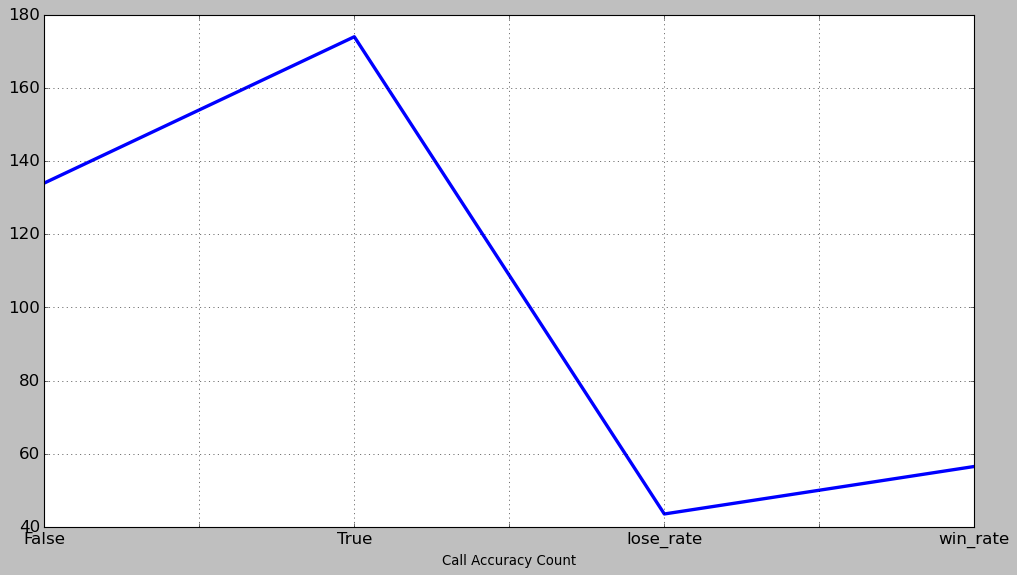

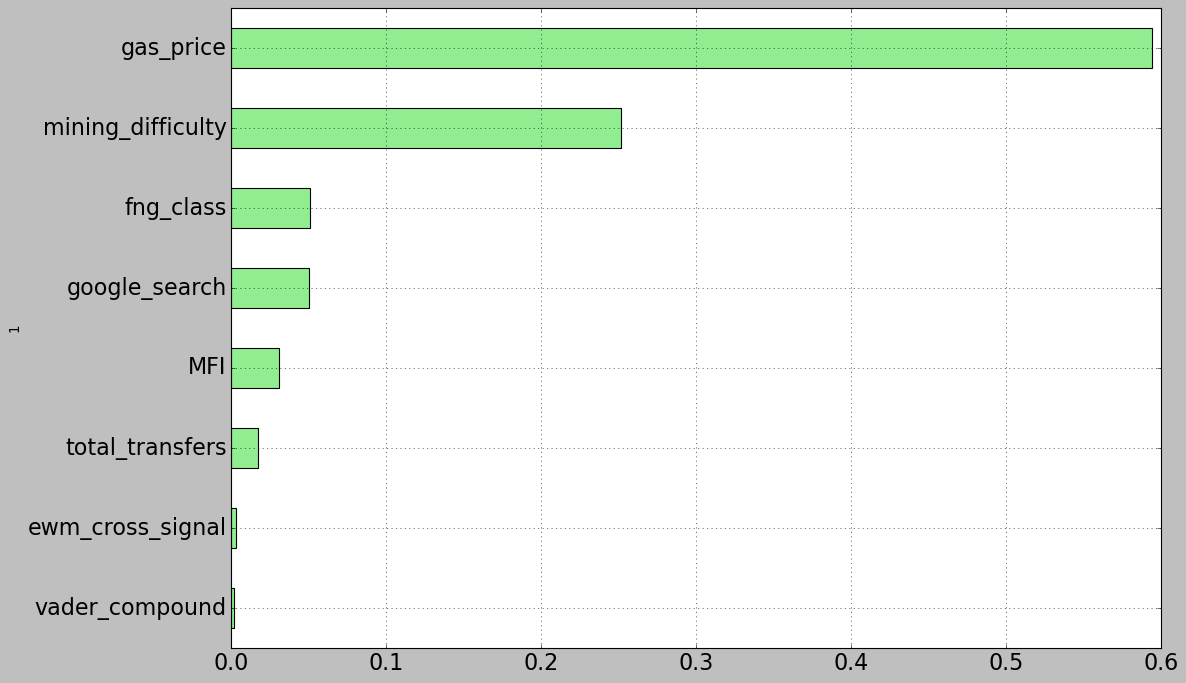

In [79]:
#portfolio_list_select = pn.widgets.MultiSelect(name='Portfolio', options=['bitcoin', 'Bitcoin', 'chainlink', 'polkadot', 'tellor'])
row_1 = pn.Row(
    btc_historical_plot(lstm_df)),
row_2 = pn.Row(
    features_plot(importances_sorted)),
    
title1 = pn.pane.Markdown('#Indicators or Historical Price? ', style={'font-family': "serif", "font-color":"navy"})
title2 = pn.pane.Markdown('#Historical Results', style={'font-family': "serif", "font-color":"navy"})
title3 = pn.pane.Markdown('#Features Importance', style={'font-family': "serif", "font-color":"navy"})

overview_column = pn.Column(title1,
    '**PROJECT BACKGROUND** - '
    'Can technical indicators be fit to a Machine Learning model '
    'and become reliable predictors of cryptocurrency prices?',
    'Are historical prices the best indicators of predicted prices? '
    'The goal of this project is to determine if either of two models can be used '
    'to accurately predict a next-day price of four cryptocurrencies: '
    'A **Random Forest Regressor** model for technical indicators as features analysis '
    'and an **LSTM Recurrent Neural Network** model for the historical price analysis. ',
    
    '###**Sentiment and Historical Features**',
    btc_df.head(), 
    '###**On-Chain Features**',
    btc_mining_df.head(),
    background='#E0DFE5', width=700, height=600, scroll=True)

#historical_column = pn.Column(title2,
 #   'How did predicted Bitcoin prices model against two-year historical prices?',
  #  btc_historical_plot(lstm_df, title = 'Bitcoin Historical Real Price vs. Predicted Price'),
   # background="#E0DFE5", width=700, height=600, scroll=True)

#features_column = pn.Column(title3,
 #   'How did the technical indicators model against historical Bitcoin prices?',
  #  features_plot(importances_df, title = 'Features Importance',
   # background="#E0DFE5", width=700, height=600, scroll=True,
#)
                            
btc_dashboard = pn.Tabs(
    ("Overview", overview_column),
    ("Heatmap", heatmap_plot),
    ("LSTM Results", btc_historical_plot),
    ("Random Forest Regressor", features_plot, shap_plot),
    dynamic=True, tabs_location="above", background="#E5E4EB"
)

btc_dashboard.servable()